In [21]:
import numpy as np
from numpy import linalg
import random 
import matplotlib.pyplot as plt

random.seed(10)

In [2]:
## Defining the function
def matrix_scaling(A,r,c, tolerance = 10**(-8)):
    (m,n) = np.shape(A)
    one_m = np.zeros(m) + 1
    one_n = np.zeros(n) + 1
    row_sum = A@one_n
    column_sum = A.T@one_m
    
    x_scale = one_m
    y_scale = one_n
    k = 1
    
    while max(np.linalg.norm(r - row_sum, np.inf), np.linalg.norm(c - column_sum, np.inf)) > tolerance:
        k = k+1
        if k % 2 == 0:
            x = r/row_sum
            x_scale = x_scale*x
            A = np.diag(x)@A
        else:
            y = c/column_sum
            y_scale = y_scale*y
            A = A@np.diag(y)
                 
        #print(max(np.linalg.norm(r - row_sum, np.inf), np.linalg.norm(c - column_sum, np.inf)))
        row_sum = A@one_n
        column_sum = A.T@one_m
    
    return x_scale, y_scale, A

def normalise(x,y):
    n_x = np.linalg.norm(x,1)
    n_y = np.linalg.norm(y,1)
    alpha = np.sqrt(n_x/n_y)
    
    return x/alpha, y*alpha

def dist(x,y,x_avg,y_avg):
    x_max = np.max(np.abs(x/x_avg - 1))
    y_max = np.max(np.abs(y/y_avg - 1))
    return max(x_max, y_max)


In [3]:
x = np.array([1,2,3,4])
y = np.array([6,7])
x_avg = np.array([1,1,1,1])
y_avg = np.array([6,5])

x_max = np.max(np.abs(x/x_avg - 1))
y_max = np.max(np.abs(y/y_avg - 1))
max(x_max, y_max)

dist(np.array([1,2,3,4]),np.array([6,7]),np.array([1,1,1,1]),np.array([6,5]))

3.0

In [4]:
#Sampling from chi squared distribution

m = 50 #size of matrix
n = 1000 # #-of samples

sample = np.random.uniform(low = 1.0, high=2.0, size =(m,m,n))
r = np.zeros(m)+1
c = r

#Storing Scaling Factors:

x_factors = np.zeros((n,m))
y_factors = np.zeros((n,m))
matrices = np.zeros((m,m,n))


for i in range(0,1000):
    A = sample[:,:,i]
    x, y, B = matrix_scaling(sample[:,:,i], r , c)
    x_factors[i,:] = x
    y_factors[i: ] = y
    matrices[:,:,i] = B   

min_val = []
for i in range(0,1000):
    min_val = min_val + [np.min(matrices[:,:,i])]
    
norm = []
mean = np.zeros((50,50))+1
mean_scaled = 1/m*(np.zeros((50,50))+1)
for i in range(0,1000):
    norm_1 = [np.linalg.norm(matrices[:,:,i] - mean, 2)]
    norm = norm + norm_1

min_val_2 = []
for i in range(0,1000):
    min_val_2 = min_val_2 + [np.min(matrices[:,:,i]/sample[:,:,i])]
    
max_val_2 = []
for i in range(0,1000):
    max_val_2 = min_val_2 + [np.max(matrices[:,:,i]/sample[:,:,i])]

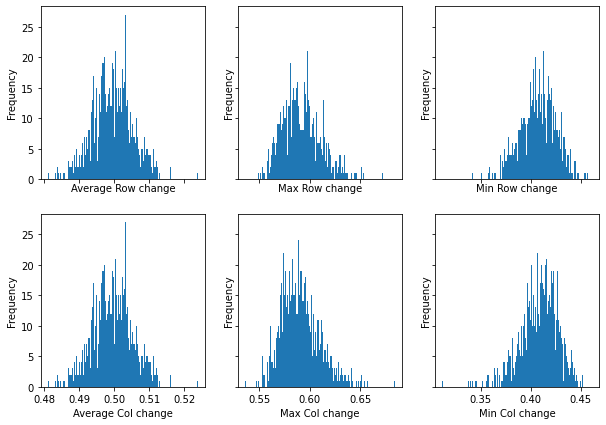

In [5]:
#Approximate scaling of matrix by scaling factors of the mean

x,y,B = matrix_scaling(mean,r,c)
x_mean, y_mean = normalise(x,y)

#Distribution of row and column scaling: Cutoff less than 1 (Necessary to apply stability of scaling factors result)

max_row_change = []
max_col_change = []

avg_row_change = []
avg_col_change = []

min_row_change = []
min_col_change = []

for i in range(0,n):
    B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
    row_sum = B@r 
    col_sum = B.T@c
    
    row_sum_change = np.abs(row_sum-1)
    col_sum_change = np.abs(col_sum-1)
    
    max_row_change = max_row_change + [np.max(row_sum_change)]
    max_col_change = max_col_change + [np.max(col_sum_change)]
    
    avg_row_change = avg_row_change + [np.mean(row_sum_change)]
    avg_col_change = avg_col_change + [np.mean(col_sum_change)]

    min_row_change = min_row_change + [np.min(row_sum_change)]
    min_col_change = min_col_change + [np.min(col_sum_change)]

#Histograms of approximate scaling:

fig, ax = plt.subplots(2, 3, figsize =(10, 7),sharex='col', sharey='row')
ax[0,0].hist(np.array(avg_row_change), bins = 200)
ax[1,0].hist(np.array(avg_col_change), bins = 200)

ax[0,0].set(xlabel = "Average Row change", ylabel= "Frequency") 
ax[1,0].set(xlabel = "Average Col change", ylabel= "Frequency") 

ax[0,1].hist(np.array(max_row_change), bins = 200)
ax[1,1].hist(np.array(max_col_change), bins = 200)

ax[0,1].set(xlabel = "Max Row change", ylabel= "Frequency") 
ax[1,1].set(xlabel = "Max Col change", ylabel= "Frequency")

ax[0,2].hist(np.array(min_row_change), bins = 200)
ax[1,2].hist(np.array(min_col_change), bins = 200)

ax[0,2].set(xlabel = "Min Row change", ylabel= "Frequency") 
ax[1,2].set(xlabel = "Min Col change", ylabel= "Frequency")

plt.show()


In [6]:
#Sampling from chi squared distribution

m = 100 #size of matrix
n = 1000 # #-of samples

sample = np.random.uniform(low = 1.0, high=2.0, size =(m,m,n))
r = np.zeros(m)+1
c = r

#Storing Scaling Factors:

x_factors = np.zeros((n,m))
y_factors = np.zeros((n,m))
matrices = np.zeros((m,m,n))


for i in range(0,n):
    A = sample[:,:,i]
    x, y, B = matrix_scaling(sample[:,:,i], r , c)
    x_factors[i,:] = x
    y_factors[i: ] = y
    matrices[:,:,i] = B   

min_val = []
for i in range(0,n):
    min_val = min_val + [np.min(matrices[:,:,i])]
    
norm = []
mean = np.zeros((m,m))+1
mean_scaled = 1/m*(np.zeros((m,m))+1)
for i in range(0,n):
    norm_1 = [np.linalg.norm(matrices[:,:,i] - mean, 2)]
    norm = norm + norm_1

min_val_2 = []
for i in range(0,n):
    min_val_2 = min_val_2 + [np.min(matrices[:,:,i]/sample[:,:,i])]
    
max_val_2 = []
for i in range(0,n):
    max_val_2 = min_val_2 + [np.max(matrices[:,:,i]/sample[:,:,i])]

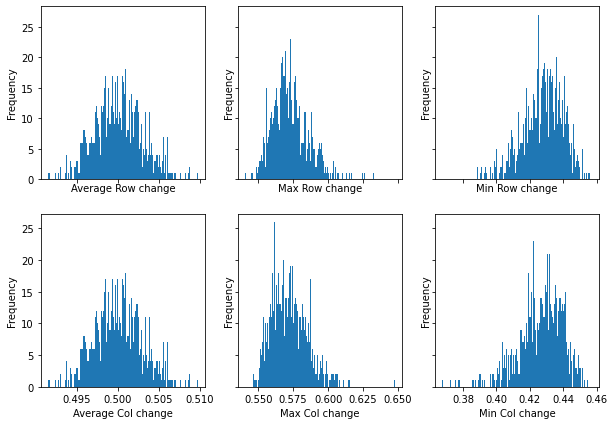

In [7]:
#Approximate scaling of matrix by scaling factors of the mean

x,y,B = matrix_scaling(mean,r,c)
x_mean, y_mean = normalise(x,y)

#Distribution of row and column scaling: Cutoff less than 1 (Necessary to apply stability of scaling factors result)

max_row_change = []
max_col_change = []

avg_row_change = []
avg_col_change = []

min_row_change = []
min_col_change = []

for i in range(0,n):
    B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
    row_sum = B@r 
    col_sum = B.T@c
    
    row_sum_change = np.abs(row_sum-1)
    col_sum_change = np.abs(col_sum-1)
    
    max_row_change = max_row_change + [np.max(row_sum_change)]
    max_col_change = max_col_change + [np.max(col_sum_change)]
    
    avg_row_change = avg_row_change + [np.mean(row_sum_change)]
    avg_col_change = avg_col_change + [np.mean(col_sum_change)]

    min_row_change = min_row_change + [np.min(row_sum_change)]
    min_col_change = min_col_change + [np.min(col_sum_change)]

#Histograms of approximate scaling:

fig, ax = plt.subplots(2, 3, figsize =(10, 7),sharex='col', sharey='row')
ax[0,0].hist(np.array(avg_row_change), bins = 200)
ax[1,0].hist(np.array(avg_col_change), bins = 200)

ax[0,0].set(xlabel = "Average Row change", ylabel= "Frequency") 
ax[1,0].set(xlabel = "Average Col change", ylabel= "Frequency") 

ax[0,1].hist(np.array(max_row_change), bins = 200)
ax[1,1].hist(np.array(max_col_change), bins = 200)

ax[0,1].set(xlabel = "Max Row change", ylabel= "Frequency") 
ax[1,1].set(xlabel = "Max Col change", ylabel= "Frequency")

ax[0,2].hist(np.array(min_row_change), bins = 200)
ax[1,2].hist(np.array(min_col_change), bins = 200)

ax[0,2].set(xlabel = "Min Row change", ylabel= "Frequency") 
ax[1,2].set(xlabel = "Min Col change", ylabel= "Frequency")

plt.show()

In [17]:
delta = []
for j in range(20,220,20):
    print(j)
    m = j #size of matrix
    n = 1000 # #-of samples

    sample = np.random.uniform(low = 1.0, high=2.0, size =(m,m,n))
    r = np.zeros(m)+1
    c = r
        
    mean = np.zeros((m,m))+1
    x,y,B_1 = matrix_scaling(mean,r,c)
    x_mean, y_mean = normalise(x,y)

    #Distribution of row and column scaling: Cutoff less than 1 (Necessary to apply stability of scaling factors result)

    max_row_change = []
    max_col_change = []

    for i in range(0,n):
        B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
        row_sum = B@r 
        col_sum = B.T@c
    
        row_sum_change = np.abs(row_sum-1)
        col_sum_change = np.abs(col_sum-1)
    
        max_row_change = max_row_change + [np.max(row_sum_change)]
        max_col_change = max_col_change + [np.max(col_sum_change)]

    delta_vals = np.maximum(np.array(max_row_change), np.array(max_col_change))
    delta = delta + [np.quantile(delta_vals, 0.8)]


20
40
60
80
100
120
140
160
180
200


In [24]:
for i in range(0,np.shape(np.arange(20,220,20))[0]):
  print(i)

0
1
2
3
4
5
6
7
8
9


In [18]:
delta

[0.6611342379765353,
 0.6270368670907556,
 0.6073011717239076,
 0.5958989367813526,
 0.5878440047348871,
 0.5824440976966365,
 0.5764409972943061,
 0.573505456185736,
 0.5696667933233616,
 0.5662585036871296]

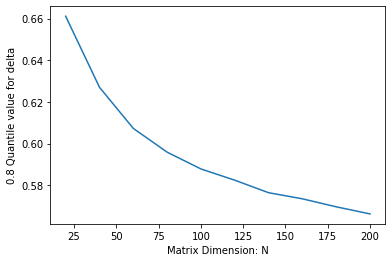

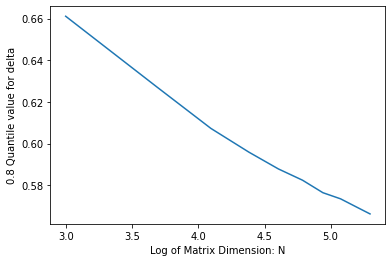

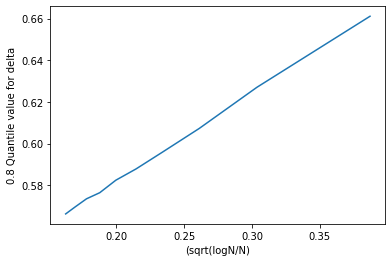

In [19]:
x_plt = np.arange(20,220,20)
y_plt = delta

plt.plot(x_plt, y_plt)
plt.xlabel("Matrix Dimension: N")
plt.ylabel("0.8 Quantile value for delta")
plt.show()

plt.plot(np.log(np.array(x_plt)), y_plt)
plt.xlabel("Log of Matrix Dimension: N")
plt.ylabel("0.8 Quantile value for delta")
plt.show()

plt.plot(np.sqrt(np.log(np.array(x_plt))/x_plt), y_plt)
plt.xlabel("(sqrt(logN/N)")
plt.ylabel("0.8 Quantile value for delta")
plt.show()

In [25]:
####Dependence on n of Bounds on Scaling Factors: Fixing Probability ######

## Bounds at 0.8 probability level: We already have estimates for delta

n_val = np.arange(20,220,20)
delta_val = delta

bound = []

for j in range(0,np.shape(n_val)[0]):
    print(j)
    m = n_val[j] #size of matrix
    n = 1000 # #-of samples

    sample = np.random.uniform(low = 1.0, high=2.0, size =(m,m,n))
    r = np.zeros(m)+1
    c = r  
        
    mean = np.zeros((m,m))+1
    x,y,B_1 = matrix_scaling(mean,r,c)
    x_mean, y_mean = normalise(x,y)
    maxi = 0
    
    x_factors = np.zeros((n,m))
    y_factors = np.zeros((n,m))
    matrices = np.zeros((m,m,n))
    for i in range(0,n):
        A = sample[:,:,i]
        x, y, B = matrix_scaling(sample[:,:,i], r , c)
        x_factors[i,:] = x
        y_factors[i: ] = y
        x,y = normalise(x,y)
        matrices[:,:,i] = B   
        
        B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
        row_sum = B@r 
        col_sum = B.T@c
        row_sum_change = np.abs(row_sum-1)
        col_sum_change = np.abs(col_sum-1)
        
        
        if max(np.max(row_sum_change), np.max(col_sum_change))<= delta_val[j]:
            maxi = max(maxi, dist(x,y,x_mean,y_mean))

    bound = bound + [maxi]

bound

0
1
2
3
4
5
6
7
8
9


[0.2691914976452475,
 0.24987359993592528,
 0.23985506188352101,
 0.2339403024670208,
 0.22964927237058064,
 0.2267336034149685,
 0.224277675864044,
 0.22219388292347564,
 0.22088134432078166,
 0.21860815316609594]

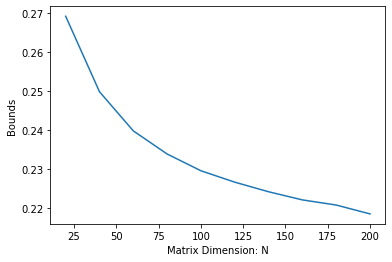

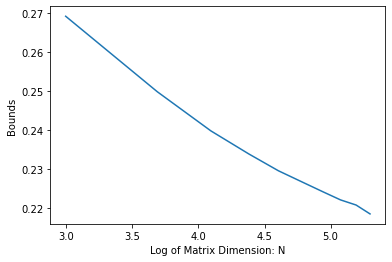

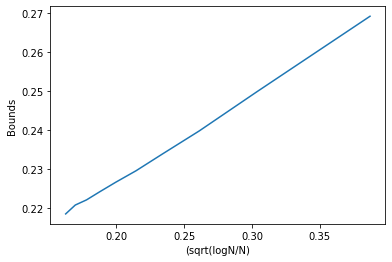

In [26]:
x_plt = np.arange(20,220,20)
y_plt = bound

plt.plot(x_plt, y_plt)
plt.xlabel("Matrix Dimension: N")
plt.ylabel("Bounds")
plt.show()

plt.plot(np.log(np.array(x_plt)), y_plt)
plt.xlabel("Log of Matrix Dimension: N")
plt.ylabel("Bounds")
plt.show()

plt.plot(np.sqrt(np.log(np.array(x_plt))/x_plt), y_plt)
plt.xlabel("(sqrt(logN/N)")
plt.ylabel("Bounds")
plt.show()

In [29]:
########### Fixing Delta: Bounds and the associated Probability ##########

delta_val = 0.60

n_val = np.arange(20,220,20)

prob = []
bound = []

for j in range(0,np.shape(n_val)[0]):
    print(j)
    m = n_val[j] #size of matrix
    n = 1000 # #-of samples

    sample = np.random.uniform(low = 1.0, high=2.0, size =(m,m,n))
    r = np.zeros(m)+1
    c = r  
        
    mean = np.zeros((m,m))+1
    x,y,B_1 = matrix_scaling(mean,r,c)
    x_mean, y_mean = normalise(x,y)
    maxi = 0
    p = 0
    
    x_factors = np.zeros((n,m))
    y_factors = np.zeros((n,m))
    matrices = np.zeros((m,m,n))
    for i in range(0,n):
        A = sample[:,:,i]
        x, y, B = matrix_scaling(sample[:,:,i], r , c)
        x_factors[i,:] = x
        y_factors[i: ] = y
        x,y = normalise(x,y)
        matrices[:,:,i] = B   
        
        B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
        row_sum = B@r 
        col_sum = B.T@c
        row_sum_change = np.abs(row_sum-1)
        col_sum_change = np.abs(col_sum-1)
        
        
        if max(np.max(row_sum_change), np.max(col_sum_change))<= delta_val: #Fixed value
            maxi = max(maxi, dist(x,y,x_mean,y_mean))
            p = p+1

    bound = bound + [maxi]
    prob = prob + [p]
bound

0
1
2
3
4
5
6
7
8
9


[0.24225762006260887,
 0.23894781828990708,
 0.23649644423438265,
 0.23632679591583516,
 0.23499892603153616,
 0.2358546093421805,
 0.23395082554164814,
 0.23449156812480698,
 0.23429442157802538,
 0.23182936743574378]

In [9]:
#Theoretical Bound:

print((1+2**4.5)*0.60) 

14.176450198781714


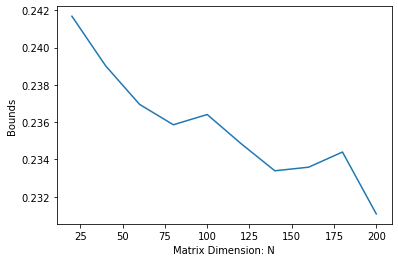

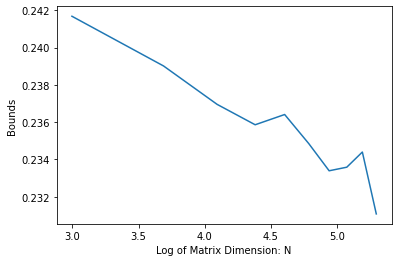

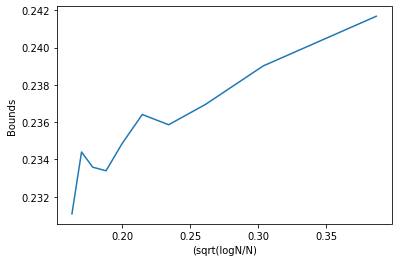

In [28]:
x_plt = np.arange(20,220,20)
y_plt = bound

plt.plot(x_plt, y_plt)
plt.xlabel("Matrix Dimension: N")
plt.ylabel("Bounds")
plt.show()

plt.plot(np.log(np.array(x_plt)), y_plt)
plt.xlabel("Log of Matrix Dimension: N")
plt.ylabel("Bounds")
plt.show()

plt.plot(np.sqrt(np.log(np.array(x_plt))/x_plt), y_plt)
plt.xlabel("(sqrt(logN/N)")
plt.ylabel("Bounds")
plt.show()

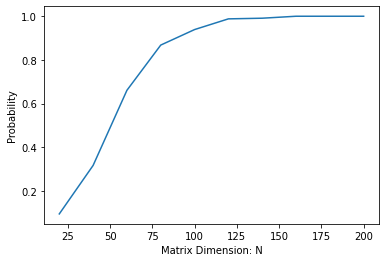

In [30]:
x_plt = np.arange(20,220,20)
y_plt = np.array(prob)/n

plt.plot(x_plt, y_plt)
plt.xlabel("Matrix Dimension: N")
plt.ylabel("Probability")
plt.show()


In [33]:
np.array(prob)/1000

array([0.095, 0.317, 0.661, 0.868, 0.939, 0.988, 0.991, 1.   , 1.   ,
       1.   ])

In [12]:
########## Analysing dependance on a #####################################

a_val = [1.5,1.3,1.1,0.9,0.7,0.5,0.3,0.1]
delta_val = 0.6

bound = []
prob = []

for j in range(0,np.shape(a_val)[0]):
    print(j)
    m = 50 #size of matrix
    n = 1000 # #-of samples

    sample = np.random.uniform(low = a_val[j], high=2.0, size =(m,m,n))
    r = np.zeros(m)+1
    c = r  
        
    mean = np.zeros((m,m))+1
    x,y,B_1 = matrix_scaling(mean,r,c)
    x_mean, y_mean = normalise(x,y)
    maxi = 0
    p = 0
    
    x_factors = np.zeros((n,m))
    y_factors = np.zeros((n,m))
    matrices = np.zeros((m,m,n))
    for i in range(0,n):
        A = sample[:,:,i]
        x, y, B = matrix_scaling(sample[:,:,i], r , c)
        x_factors[i,:] = x
        y_factors[i: ] = y
        x,y = normalise(x,y)
        matrices[:,:,i] = B   
        
        B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
        row_sum = B@r 
        col_sum = B.T@c
        row_sum_change = np.abs(row_sum-1)
        col_sum_change = np.abs(col_sum-1)
        
        
        if max(np.max(row_sum_change), np.max(col_sum_change))<= delta_val:
            maxi = max(maxi, dist(x,y,x_mean,y_mean))
            p = p+1

    bound = bound + [maxi]
    prob = prob + [p]

bound

0
1
2
3
4
5
6
7


[0,
 0,
 0,
 0.24888283530497468,
 0.26414275353758676,
 0.2524396200144168,
 0.2784153607572588,
 0.40999849430407265]

In [13]:
prob

[0, 0, 0, 962, 1000, 1000, 1000, 1000]

In [20]:
##### Distribution of delta as a function of a ###

prob = []
delta_val = 0.6

a_val = [1.5,1.4,1.3,1.2,1.1,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]

bound = []
prob = []

for j in range(0,np.shape(a_val)[0]):
    #print(j)
    m = 50 #size of matrix
    n = 1000 # #-of samples

    sample = np.random.uniform(low = a_val[j], high=2.0, size =(m,m,n))
    r = np.zeros(m)+1
    c = r
        
    mean = np.zeros((m,m))+1
    x,y,B_1 = matrix_scaling(mean,r,c)
    x_mean, y_mean = normalise(x,y)

    #Distribution of row and column scaling: Cutoff less than 1 (Necessary to apply stability of scaling factors result)

    max_row_change = []
    max_col_change = []
    p = 0

    for i in range(0,n):
        B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
        row_sum = B@r 
        col_sum = B.T@c
    
        row_sum_change = np.abs(row_sum-1)
        col_sum_change = np.abs(col_sum-1)
    
        max_row_change = max_row_change + [np.max(row_sum_change)]
        max_col_change = max_col_change + [np.max(col_sum_change)]
        if np.maximum(np.max(row_sum_change), np.max(col_sum_change)) <= delta_val:
          p = p+1
    print(j,p)


0 0
1 0
2 0
3 0
4 0
5 517
6 964
7 1000
8 1000
9 1000
10 1000
11 1000
12 1000
13 1000
14 1000


In [26]:
####### Plotting minimum and maximum values as a function of a

prob = []
min_scal = []
max_scal = []

print("a_val, min scaling.  , max scaling.   , 0.8 quantile") 
a_val = [1.5,1.4,1.3,1.2,1.1,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]

for j in range(0,np.shape(a_val)[0]):
    #print(j)
    m = 50 #size of matrix
    n = 1000 # #-of samples

    sample = np.random.uniform(low = a_val[j], high=2.0, size =(m,m,n))
    r = np.zeros(m)+1
    c = r
        
    mean = np.zeros((m,m))+1
    x,y,B_1 = matrix_scaling(mean,r,c)
    x_mean, y_mean = normalise(x,y)

    #Distribution of row and column scaling: Cutoff less than 1 (Necessary to apply stability of scaling factors result)

    max_row_change = []
    max_col_change = []
    p = 0

    for i in range(0,n):
        B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
        row_sum = B@r 
        col_sum = B.T@c
    
        row_sum_change = np.abs(row_sum-1)
        col_sum_change = np.abs(col_sum-1)
    
        max_row_change = max_row_change + [np.max(row_sum_change)]
        max_col_change = max_col_change + [np.max(col_sum_change)]
        max_row_change = max_row_change + [np.max(row_sum_change)]
        max_col_change = max_col_change + [np.max(col_sum_change)]

    delta_vals = np.maximum(np.array(max_row_change), np.array(max_col_change))
    min_scal= min_scal + [np.min(delta_vals)]
    max_scal= max_scal + [np.max(delta_vals)]
    delta_vals = np.maximum(np.array(max_row_change), np.array(max_col_change))
    delta = delta + [np.quantile(delta_vals, 0.8)]

    print(a_val[j],np.min(delta_vals),np.max(delta_vals), np.quantile(delta_vals, 0.8))


a_val, min scaling.  , max scaling.   , 0.8 quantile
1.5 0.777993230114115 0.8396261402641239 0.8076761592786154
1.4 0.7349573228180126 0.8113528098834413 0.7693138256467009
1.3 0.6926988348132452 0.7938307995166363 0.7306356191851001
1.2 0.640114582421266 0.7363392065187169 0.691494785706725
1.1 0.594353852903059 0.7083171987224373 0.6536928647575443
1.0 0.5581292855086408 0.6706999155144093 0.6140248187509695
0.9 0.504973706591237 0.628882052739745 0.5784274382203054
0.8 0.4730192273031828 0.6018843358562549 0.541807987184788
0.7 0.4174434394412079 0.5847707463438059 0.5004760431152636
0.6 0.38114731267168556 0.5383397029447958 0.46305421637481625
0.5 0.3381513844242836 0.512036077072727 0.42418095391138155
0.4 0.28799990205421655 0.4829658255510878 0.38414681631897973
0.3 0.24530132208680144 0.42518165607929603 0.34455661074822247
0.2 0.18755685006013878 0.42932957084531864 0.30638511385018213
0.1 0.16943118237048593 0.37685942489195035 0.27017815457347427


In [27]:
# Keeping b/a fixed

prob = []
min_scal = []
max_scal = []

print("a_val, min scaling.  , max scaling.   , 0.8 quantile") 
a_val = [1.5,1.4,1.3,1.2,1.1,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]

for j in range(0,np.shape(a_val)[0]):
    #print(j)
    m = 50 #size of matrix
    n = 1000 # #-of samples

    sample = np.random.uniform(low = a_val[j], high=2.0*a_val[j], size =(m,m,n))
    r = np.zeros(m)+1
    c = r
        
    mean = np.zeros((m,m))+1
    x,y,B_1 = matrix_scaling(mean,r,c)
    x_mean, y_mean = normalise(x,y)

    #Distribution of row and column scaling: Cutoff less than 1 (Necessary to apply stability of scaling factors result)

    max_row_change = []
    max_col_change = []
    p = 0

    for i in range(0,n):
        B = np.diag(x_mean)@sample[:,:,i]@np.diag(y_mean)
        row_sum = B@r 
        col_sum = B.T@c
    
        row_sum_change = np.abs(row_sum-1)
        col_sum_change = np.abs(col_sum-1)
    
        max_row_change = max_row_change + [np.max(row_sum_change)]
        max_col_change = max_col_change + [np.max(col_sum_change)]
        max_row_change = max_row_change + [np.max(row_sum_change)]
        max_col_change = max_col_change + [np.max(col_sum_change)]

    delta_vals = np.maximum(np.array(max_row_change), np.array(max_col_change))
    min_scal= min_scal + [np.min(delta_vals)]
    max_scal= max_scal + [np.max(delta_vals)]
    delta_vals = np.maximum(np.array(max_row_change), np.array(max_col_change))
    delta = delta + [np.quantile(delta_vals, 0.8)]

    print(a_val[j],np.min(delta_vals),np.max(delta_vals), np.quantile(delta_vals, 0.8))



a_val, min scaling.  , max scaling.   , 0.8 quantile
1.5 1.3374906411157133 1.5031333661751045 1.4224044515059977
1.4 1.1695768836001523 1.3472454341579083 1.2629888444581394
1.3 1.0247765379866158 1.163771793047177 1.1003610926683165
1.2 0.8688328139773396 1.01368002815286 0.9399627169411016
1.1 0.7116862921661165 0.8434627223231326 0.7770557705974284
1.0 0.5600144783432839 0.6784362594147457 0.6143640138491696
0.9 0.40576060947145676 0.5011153622331257 0.4538097446754351
0.8 0.2500513195740932 0.3513311363151661 0.2909400403460203
0.7 0.08440497419976967 0.18103688065404366 0.1312890440930518
0.6 0.1352687174721745 0.20616726347367598 0.16928822532224452
0.5 0.2793777444265132 0.33897644547002004 0.30688472446047854
0.4 0.4244102772613899 0.47182501649862363 0.4455898609081059
0.3 0.5675696971303763 0.6001062851256999 0.5849640869688774
0.2 0.7122356859122662 0.7334056802284015 0.7228300347442977
0.1 0.8556790303191376 0.8677886577332748 0.8614548105423331


In [ ]:
######### Analysing dependance on min a ##################################

## Fixed m and n